In [72]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [152]:
#Checking the skewness of data

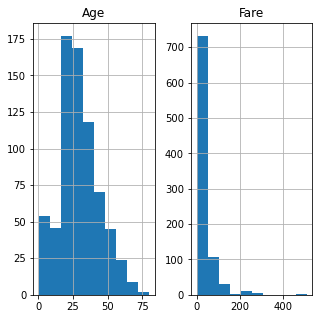

In [77]:
import matplotlib.pyplot as plt
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(5,5))
plt.show()

In [78]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [79]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

In [80]:
#Checking for outliers

Text(0.5, 1.0, 'Pclass')

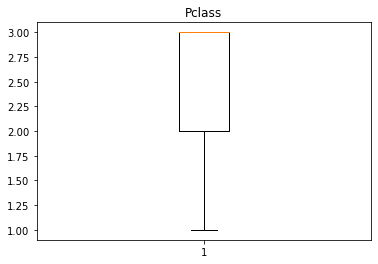

In [81]:
plt.boxplot(X['Pclass'])
plt.title('Pclass')

In [150]:
#No outlier

Text(0.5, 1.0, 'SibSp')

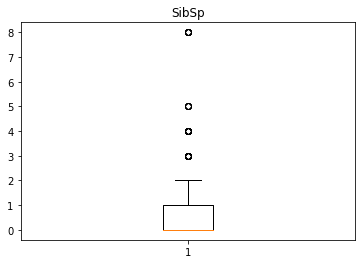

In [82]:
plt.boxplot(X['SibSp'])
plt.title('SibSp')

In [83]:
import numpy as np
Q1=np.percentile(X['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(X['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(X['SibSp'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

0.0 
 0.0 
 1.0


In [84]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

1.0 
 -1.5 
 2.5


In [85]:
outlier=[]
for x in X['SibSp']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [86]:
print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [87]:
indx1=X['SibSp'][(X['SibSp']>Up_limit)|(X['SibSp']<low_limit)].index
X.loc[indx1].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [88]:
# Dropping the outliers

In [89]:
df.drop([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],inplace=True)

In [90]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

Text(0.5, 1.0, 'SibSp')

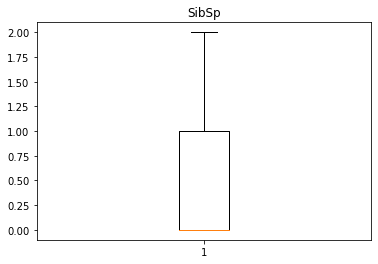

In [91]:
plt.boxplot(X['SibSp'])
plt.title('SibSp')

In [92]:
#outlier removed

Text(0.5, 1.0, 'Parch')

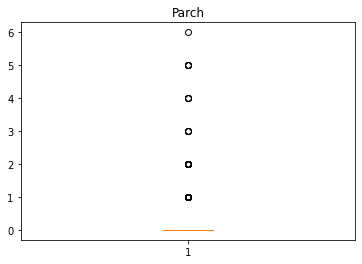

In [93]:
plt.boxplot(X['Parch'])
plt.title('Parch')

In [94]:
Q1=np.percentile(X['Parch'],25,interpolation='midpoint')
Q2=np.percentile(X['Parch'],50,interpolation='midpoint')
Q3=np.percentile(X['Parch'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

0.0 
 0.0 
 0.0


In [95]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

0.0 
 0.0 
 0.0


In [96]:
outlier=[]
for x in X['Parch']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [97]:
print(outlier)

[2, 1, 5, 5, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 2]


In [98]:
indx1=X['Parch'][(X['Parch']>Up_limit)|(X['Parch']<low_limit)].index
X.loc[indx1].index

Int64Index([  8,  10,  13,  25,  43,  54,  58,  65,  78,  86,
            ...
            853, 855, 856, 858, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=169)

In [99]:
# Dropping the outliers

In [100]:
df.drop(X.loc[indx1].index,inplace=True)

In [101]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

Text(0.5, 1.0, 'Parch')

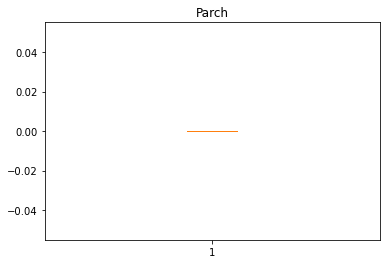

In [102]:
plt.boxplot(X['Parch'])
plt.title('Parch')

In [151]:
#Outlier removed

Text(0.5, 1.0, 'Fare')

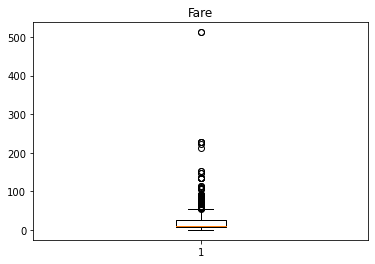

In [103]:
plt.boxplot(X['Fare'])
plt.title('Fare')

In [104]:
Q1=np.percentile(X['Fare'],25,interpolation='midpoint')
Q2=np.percentile(X['Fare'],50,interpolation='midpoint')
Q3=np.percentile(X['Fare'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

7.8542 
 10.5 
 26.0


In [105]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

18.1458 
 -19.364500000000003 
 53.2187


In [106]:
outlier=[]
for x in X['Fare']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [107]:
print(outlier)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 56.4958, 61.175, 73.5, 79.2, 66.6, 56.4958, 146.5208, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 135.6333, 77.9583, 78.85, 91.0792, 110.8833, 108.9, 56.9292, 83.1583, 135.6333, 133.65, 66.6, 134.5, 75.25, 69.3, 55.4417, 135.6333, 82.1708, 227.525, 73.5, 113.275, 90.0, 55.9, 89.1042, 91.0792, 90.0, 78.2667, 86.5, 108.9, 56.4958, 59.4, 93.5, 221.7792, 106.425, 106.425, 227.525, 55.9, 78.2667, 56.9292, 153.4625, 77.9583, 69.3, 56.4958, 76.7292, 73.5, 133.65, 73.5, 76.7292, 57.0, 56.4958, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 86.5, 77.9583, 57.0, 79.2, 56.4958, 80.0, 56.4958, 89.1042]


In [113]:
indx2=X['Fare'][(X['Fare']>Up_limit)|(X['Fare']<low_limit)].index
X.loc[indx2].index

Int64Index([], dtype='int64')

In [109]:
#Dropping the outliers

In [114]:
df.drop(X.loc[indx2].index,inplace=True)

In [115]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

Text(0.5, 1.0, 'Fare')

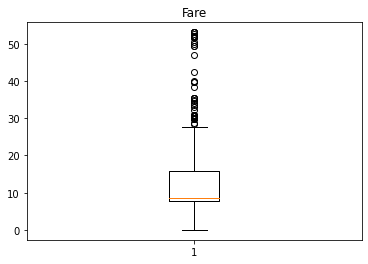

In [118]:
plt.boxplot(X['Fare'])
plt.title('Fare')

In [149]:
#Normalisation

In [119]:
from sklearn import preprocessing
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,591.000000,591.000000,591.0,591.000000
mean,0.265197,0.010815,0.0,0.934929
std,0.175883,0.029999,0.0,0.154015
min,0.018826,0.000000,0.0,0.000000
25%,0.152057,0.000000,0.0,0.932958
50%,0.327251,0.000000,0.0,0.944937
75%,0.359984,0.000000,0.0,0.988372
max,1.000000,0.229710,0.0,0.999815


In [148]:
# Splitting to test train

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Classification using SVM

In [122]:
from sklearn.svm import SVC
svm_linear=SVC(kernel = 'linear', C = 1, gamma = 'auto')
svm_linear.fit(X_train,Y_train)
Y_predictions=svm_linear.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[83  0]
 [36  0]]
Accuracy is:  0.6974789915966386
Recall is:  0.5
f1 is:  0.41089108910891087


# Random Search Tuning

In [127]:
from sklearn.model_selection import cross_val_score,KFold
model = SVC(kernel = 'linear', C = 1, gamma = 'auto')
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.69747899 0.68644068 0.72881356 0.70338983 0.77118644]
Average Cross Validation score :0.717461900014243


In [138]:
parameters ={'C' : [0.1, 1, 10, 100, 1000],
     'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel' : ['rbf']}
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(model, parameters, n_iter = 25)
random_result = random_search.fit(X_train, Y_train)
print('Best Score:', random_result.best_score_*100)
print('Best Params:', random_result.best_params_)

Best Score: 72.24636058230682
Best Params: {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


# Hyperopt Tuning

In [142]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [144]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials


In [145]:
space = {'C': hp.choice('C', [0.1, 1, 10, 100, 1000]), 
              'gamma': hp.choice('gamma', [1, 0.1, 0.01, 0.001, 0.0001]),
              'kernel':  hp.choice('kernel', ['rbf'])} 
def hyperparameter_tuning(params):
    clf = SVC(**params)
    acc = cross_val_score(clf, X_train, Y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [146]:
from sklearn.model_selection import cross_val_score
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|███████████████████████████████████████████████| 50/50 [00:02<00:00, 22.75trial/s, best loss: -0.7224636058230682]
Best: {'C': 2, 'gamma': 2, 'kernel': 0}


In [147]:
trials.results

[{'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status': 'ok'},
 {'loss': -0.7224636058230682, 'status':